# Project By - Parth Shrivastava

## Import the necessary libraries 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
email_df = pd.read_csv('spam.csv',encoding=('ISO-8859-1'))
email_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Analysis and Preprocessing 

In [83]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
email_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [85]:
email_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [86]:
email_df.shape

(5572, 5)

In [87]:
email_df.size

27860

In [88]:
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [89]:
email_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [90]:
email_df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [91]:
email_df.groupby('v1').count()

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
v1,,,,
ham,4825,45,10,6
spam,747,5,2,0


#### Check for NULL values in the dataset 

In [92]:
email_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [93]:
# As last three columns contain NULL values, remove them.
email_df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [94]:
email_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Visulaization of dataset after analysis 

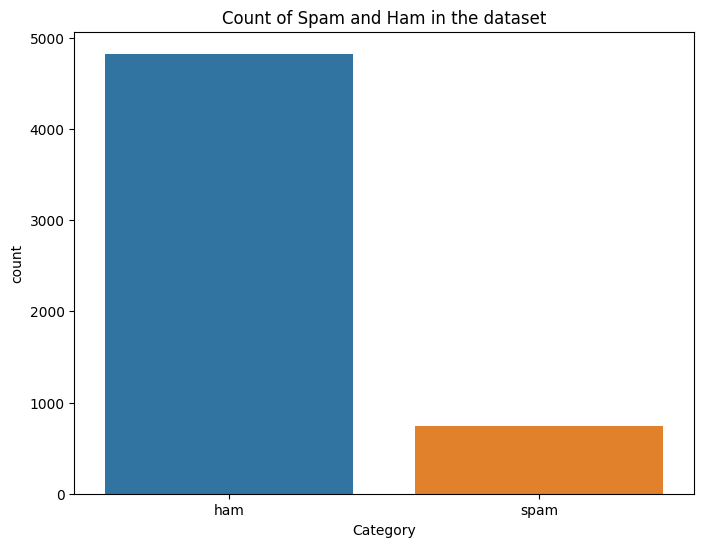

In [95]:
plt.figure(figsize = (8,6))
sns.countplot(x = email_df['v1'])
plt.title("Count of Spam and Ham in the dataset")
plt.xlabel("Category")
plt.show()

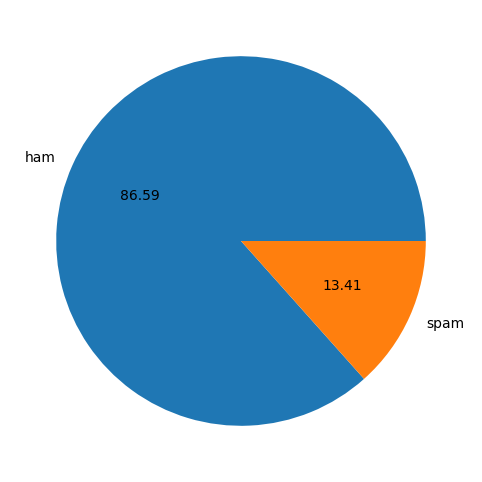

In [96]:
plt.figure(figsize = (8,6))
plt.pie(email_df['v1'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

## Prediction 

In [97]:
# Label Encoding of the categorical columns.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
email_df['v1'] = lb.fit_transform(email_df['v1'])
email_df['v1'].head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int32

#### Remove unwanted elements like symbols, numbers, etc. Use Tokenizer

In [98]:
from nltk.tokenize import RegexpTokenizer
tn = RegexpTokenizer(r'[a-zA-Z0-9]')

In [99]:
x = email_df['v2'].values
y = email_df['v1'].values

#### Splitting the datasets into train and test 

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4179,), (1393,), (4179,), (1393,))

In [101]:
# converting string into integer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

## Implementing Models for best predictions. 

### Logistic Regression 

In [102]:
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
print(c.fit(x_train,y_train))

LogisticRegression()


In [105]:
y_pred=c.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.shape)

predicted-y [0 0 0 0 0] actual-y [0 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


#### Visualizing the confusion matrix using heatmap. 

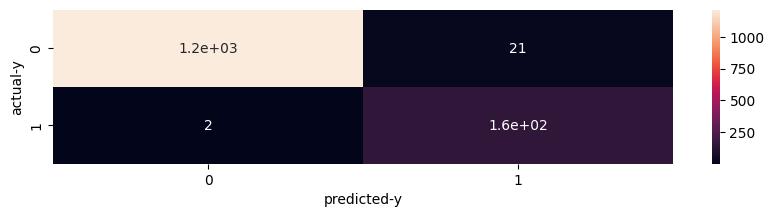

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

### Accuracy score 

In [108]:
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',c.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1234
           1       0.88      0.99      0.93       159

    accuracy                           0.98      1393
   macro avg       0.94      0.99      0.96      1393
weighted avg       0.99      0.98      0.98      1393

accuracy-score 0.9834888729361091
Model score 0.9834888729361091


### SVM 

In [111]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf', random_state=0)
svm.fit(x_train, y_train)

SVC(random_state=0)

In [119]:
y_pred=svm.predict(x_test)
print(f'predicted-y',y_pred[:5],'actual-y',y_test[:5])
print(f'predicted-y_shape',y_pred.shape,'actual-y-shape',y_test.shape)

predicted-y [0 0 0 0 0] actual-y [0 0 0 0 0]
predicted-y_shape (1393,) actual-y-shape (1393,)


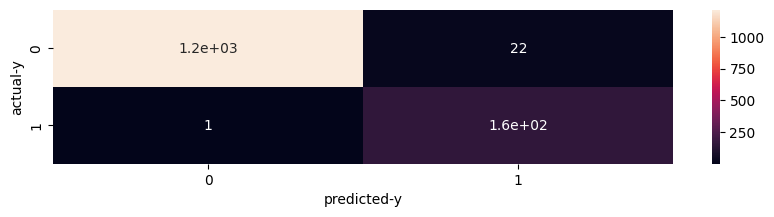

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,2))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

In [123]:
print(classification_report(y_pred,y_test))
print('accuracy-score',accuracy_score(y_pred,y_test))
print('Model score',svm.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1236
           1       0.88      0.99      0.93       157

    accuracy                           0.98      1393
   macro avg       0.94      0.99      0.96      1393
weighted avg       0.99      0.98      0.98      1393

accuracy-score 0.9834888729361091
Model score 0.9834888729361091
